In [88]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
#from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step....
from IPython.display import Image  
#import pydotplus as pydot
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import tree
from os import system

In [89]:
df = pd.read_csv('vehicle-1.csv')
df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [90]:
df.shape

(846, 19)

We can see there are 849 rows and 19 columns

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

So we can see there are 14 columns with datatype float and 4 columns of data type 4 and Object type 1

In [92]:
df.describe().T # descriptive statistics of each of the attributes

,count,mean,std,min,25%,50%,75%,max
compactness,846.0,93.678487,8.234474,73.0,87.00,93.0,100.0,119.0
circularity,841.0,44.828775,6.152172,33.0,40.00,44.0,49.0,59.0
distance_circularity,842.0,82.110451,15.778292,40.0,70.00,80.0,98.0,112.0
radius_ratio,840.0,168.888095,33.520198,104.0,141.00,167.0,195.0,333.0
pr.axis_aspect_ratio,844.0,61.678910,7.891463,47.0,57.00,61.0,65.0,138.0
max.length_aspect_ratio,846.0,8.567376,4.601217,2.0,7.00,8.0,10.0,55.0
scatter_ratio,845.0,168.901775,33.214848,112.0,147.00,157.0,198.0,265.0
elongatedness,845.0,40.933728,7.816186,26.0,33.00,43.0,46.0,61.0
pr.axis_rectangularity,843.0,20.582444,2.592933,17.0,19.00,20.0,23.0,29.0
max.length_rectangularity,846.0,147.998818,14.515652,118.0,137.00,146.0,159.0,188.0


We can see there are missing values in skewness columns,scaled variance, radius ratio,circularity, etc. 
The scatter ratio and radius ratio has a much larger std deviation. 
Otherwise the values look good.

In [93]:
df.columns 

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class'],
      dtype='object')

The columns of the data for reference.

### Correlation Matrix

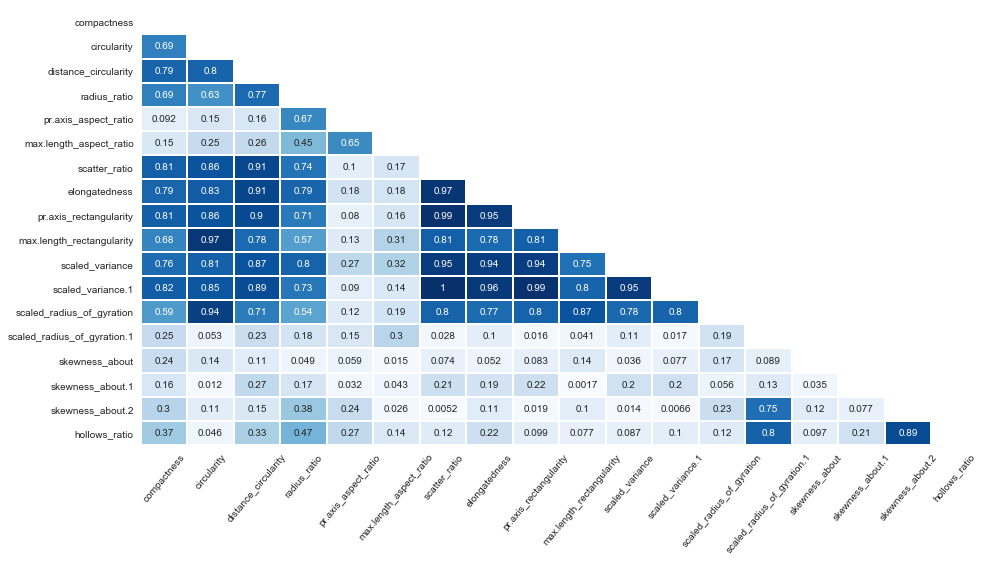

In [94]:
corr = abs(df.corr()) # correlation matrix
lower_triangle = np.tril(corr, k = -1)  # select only the lower triangle of the correlation matrix
mask = lower_triangle == 0  # to mask the upper triangle in the following heatmap

plt.figure(figsize = (15,8))  # setting the figure size
sns.set_style(style = 'white')  # Setting it to white so that we do not see the grid lines
sns.heatmap(lower_triangle, center=0.5, cmap= 'Blues', annot= True, xticklabels = corr.index, yticklabels = corr.columns,
            cbar= False, linewidths= 1, mask = mask)   # Da Heatmap
plt.xticks(rotation = 50)   # Aesthetic purposes
plt.yticks(rotation = 0)   # Aesthetic purposes
plt.show()

- We can see there is high correlation between scaled_variance.1 with scatter ratio and pr.axis_rectangularity
- The pr.axis_rectangularity and scatter ratio also has high correlation.
- The max.length_rectangularity and circularity also has high correlation.

In [95]:
df.drop(columns='scaled_variance.1',inplace=True)
df.drop(columns='pr.axis_rectangularity',inplace=True)

The columns with max correlation have been dropped for better performance.

## Checking for Missing values

In [96]:
def missing_check(df):
    total = df.isnull().sum().sort_values(ascending=False)   # total number of null values
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)  # percentage of values that are null
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])  # putting the above two together
    return missing_data # return the dataframe
missing_check(df)

,Total,Percent
radius_ratio,6,0.007092
skewness_about,6,0.007092
circularity,5,0.005910
scaled_radius_of_gyration.1,4,0.004728
distance_circularity,4,0.004728
scaled_variance,3,0.003546
scaled_radius_of_gyration,2,0.002364
pr.axis_aspect_ratio,2,0.002364
skewness_about.2,1,0.001182
skewness_about.1,1,0.001182


In [97]:
df.isnull().sum().sum()

36

- As we can see there are about 36 missing values.

 I have chosen to drop the missing values

In [100]:
df = df.dropna()

They have been replaced with median values of the respective values.

In [101]:
df.isnull().sum().sum()

0

There are no more null values.

## EDA

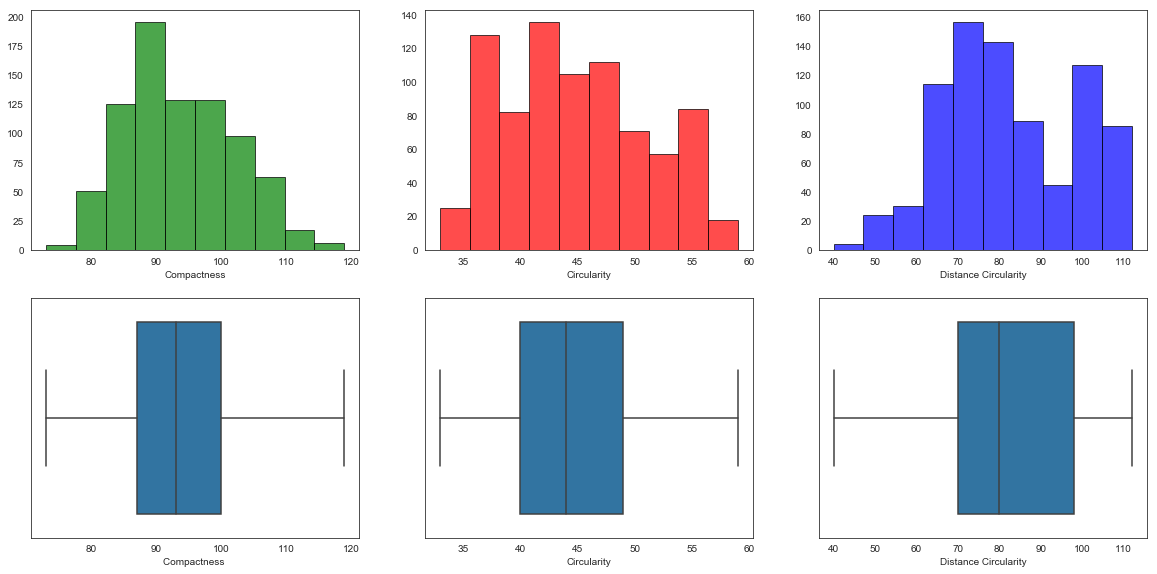

In [102]:
plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
plt.hist(df['compactness'], color='green', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Compactness')

plt.subplot(3,3,2)
plt.hist(df['circularity'], color='red', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Circularity')

plt.subplot(3,3,3)
plt.hist(df['distance_circularity'], color='blue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Distance Circularity')

plt.subplot(3,3,4)
sns.boxplot(x=df['compactness'])
plt.xlabel('Compactness ')

plt.subplot(3,3,5)
sns.boxplot(x=df['circularity'])
plt.xlabel('Circularity')

plt.subplot(3,3,6)
sns.boxplot(x=df['distance_circularity'])
plt.xlabel('Distance Circularity')
plt.show()

As we can see ther are not much outliers and compactnessand the distribution is mostly normal except in Distance Circularity where there are two heads

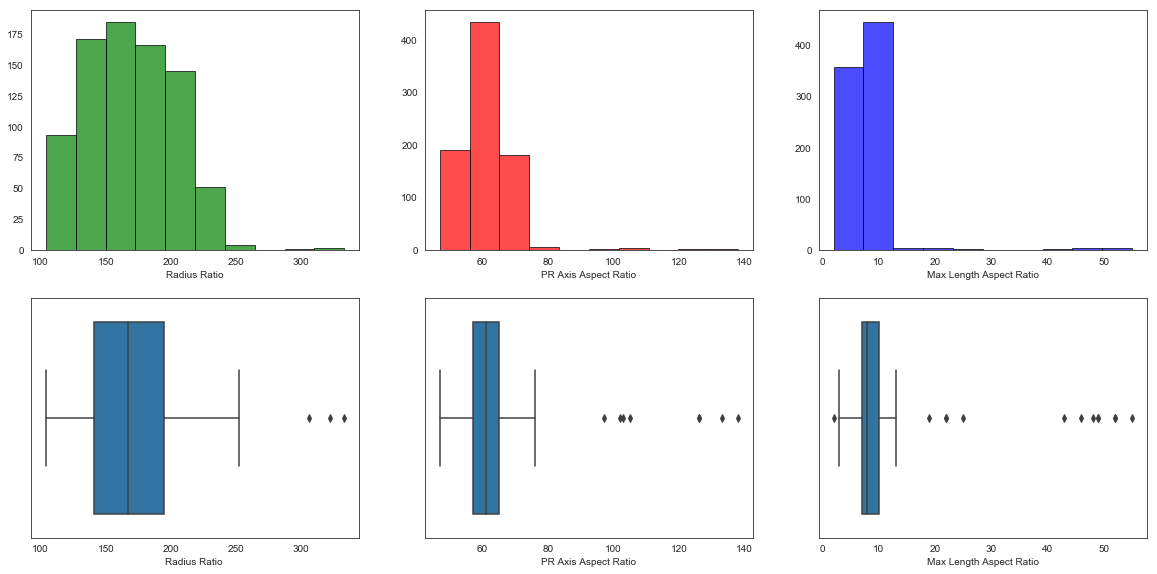

In [103]:
plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
plt.hist(df['radius_ratio'], color='green', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Radius Ratio')

plt.subplot(3,3,2)
plt.hist(df['pr.axis_aspect_ratio'], color='red', edgecolor = 'black', alpha = 0.7)
plt.xlabel('PR Axis Aspect Ratio')

plt.subplot(3,3,3)
plt.hist(df['max.length_aspect_ratio'], color='blue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Max Length Aspect Ratio')

plt.subplot(3,3,4)
sns.boxplot(x=df['radius_ratio'])
plt.xlabel('Radius Ratio ')

plt.subplot(3,3,5)
sns.boxplot(x=df['pr.axis_aspect_ratio'])
plt.xlabel('PR Axis Aspect Ratio')

plt.subplot(3,3,6)
sns.boxplot(x=df['max.length_aspect_ratio'])
plt.xlabel('Max Length Aspect Ratio')
plt.show()

As we see here there are some outliers in this graph for all three columsn Radius Ratio , PR Axix Aspect Ratio and Max Lenght Aspect Ratio. We have to see how many rows of data are included and decide what ot do with those outliers.

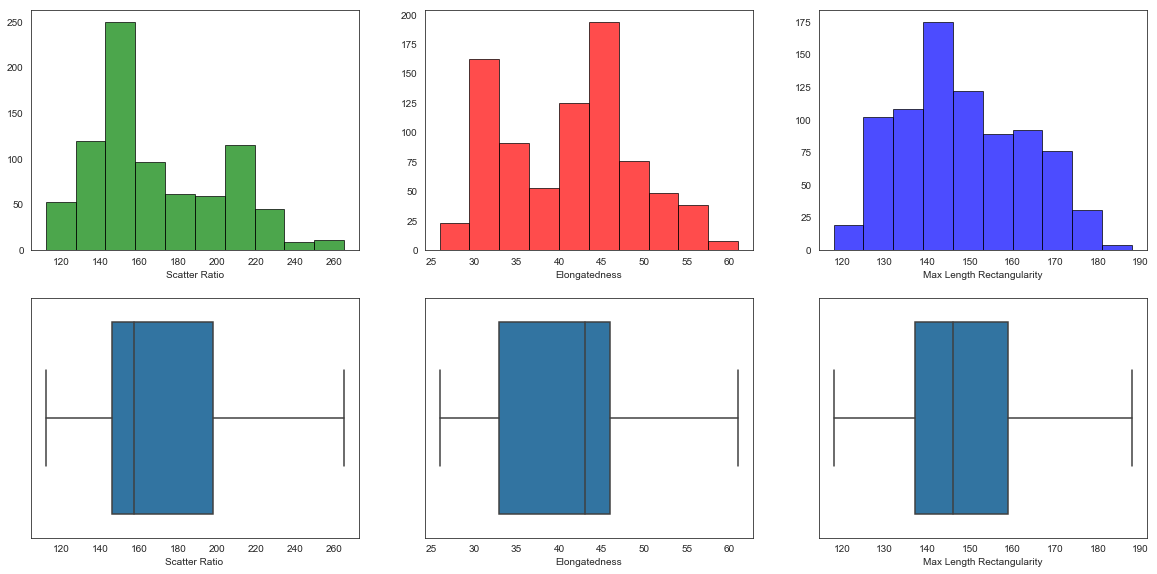

In [104]:
plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
plt.hist(df['scatter_ratio'], color='green', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Scatter Ratio')

plt.subplot(3,3,2)
plt.hist(df['elongatedness'], color='red', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Elongatedness')

plt.subplot(3,3,3)
plt.hist(df['max.length_rectangularity'], color='blue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Max Length Rectangularity')

plt.subplot(3,3,4)
sns.boxplot(x=df['scatter_ratio'])
plt.xlabel('Scatter Ratio ')

plt.subplot(3,3,5)
sns.boxplot(x=df['elongatedness'])
plt.xlabel('Elongatedness')

plt.subplot(3,3,6)
sns.boxplot(x=df['max.length_rectangularity'])
plt.xlabel('Max Length Rectangularity')
plt.show()

- There doesnt seem to be any outliers in these columns.
- The distribution is almost normal for scatter ratio , and Max Length Rectangularity
- The Elongatedness column has two heads.

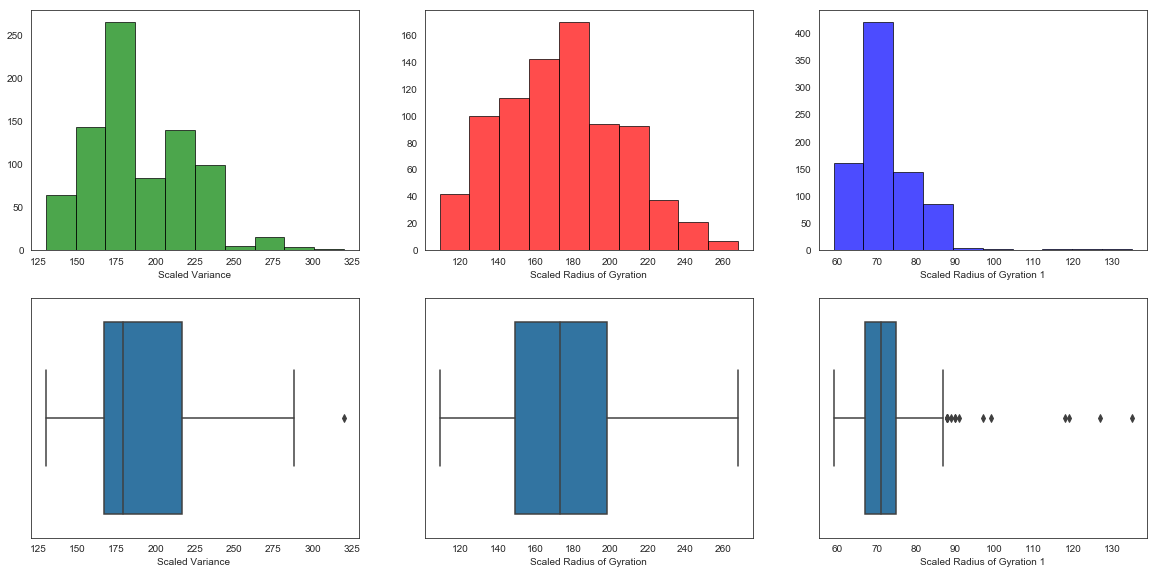

In [105]:
plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
plt.hist(df['scaled_variance'], color='green', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Scaled Variance')

plt.subplot(3,3,2)
plt.hist(df['scaled_radius_of_gyration'], color='red', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Scaled Radius of Gyration')

plt.subplot(3,3,3)
plt.hist(df['scaled_radius_of_gyration.1'], color='blue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Scaled Radius of Gyration 1')

plt.subplot(3,3,4)
sns.boxplot(x=df['scaled_variance'])
plt.xlabel('Scaled Variance ')

plt.subplot(3,3,5)
sns.boxplot(x=df['scaled_radius_of_gyration'])
plt.xlabel('Scaled Radius of Gyration')

plt.subplot(3,3,6)
sns.boxplot(x=df['scaled_radius_of_gyration.1'])
plt.xlabel('Scaled Radius of Gyration 1')
plt.show()

- The Scaled variance and Scaled Radius of Gyration doesnt seem to have 1 or no outliers and their distribution is quite normal.
- The Scaled Radius of Gyration 1 has some outliers .

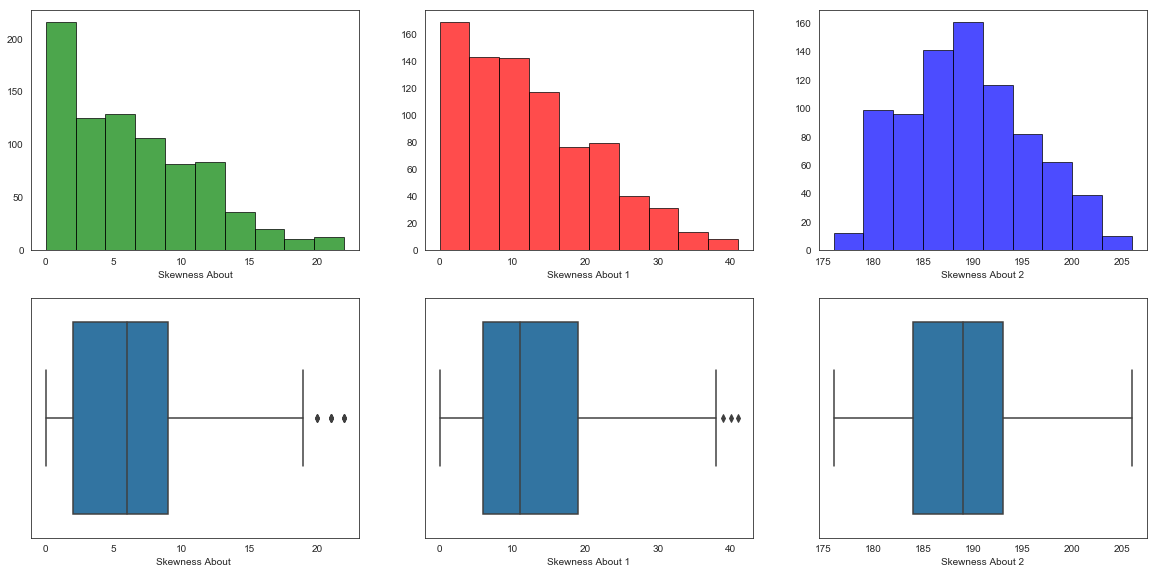

In [106]:
plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
plt.hist(df['skewness_about'], color='green', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Skewness About')

plt.subplot(3,3,2)
plt.hist(df['skewness_about.1'], color='red', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Skewness About 1')

plt.subplot(3,3,3)
plt.hist(df['skewness_about.2'], color='blue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Skewness About 2')

plt.subplot(3,3,4)
sns.boxplot(x=df['skewness_about'])
plt.xlabel('Skewness About ')

plt.subplot(3,3,5)
sns.boxplot(x=df['skewness_about.1'])
plt.xlabel('Skewness About 1')

plt.subplot(3,3,6)
sns.boxplot(x=df['skewness_about.2'])
plt.xlabel('Skewness About 2')
plt.show()

- As we see there are some outliers in Skewness About and in Skewness About 1
- There are no outliers in Skewness About 2
- The distribution look normal in Skewness About 2 and left skewed in Skewness About and Skewness About 1

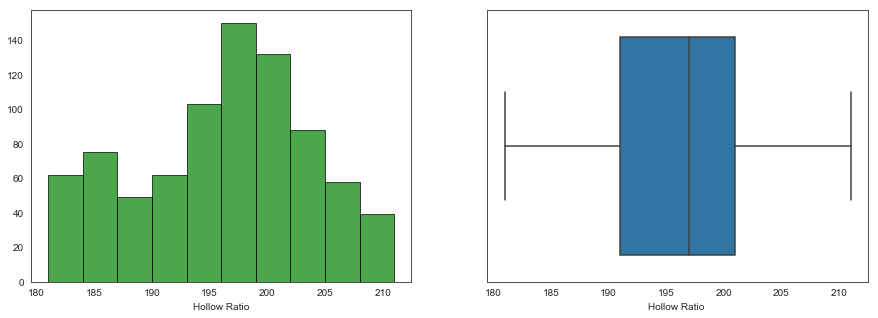

In [107]:
plt.figure(figsize= (15,5))
plt.subplot(1,2,1)
plt.hist(df['hollows_ratio'], color='green', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Hollow Ratio')



plt.subplot(1,2,2)
sns.boxplot(x=df['hollows_ratio'])
plt.xlabel('Hollow Ratio ')


plt.show()

- As we see there are no outliers in this column as well.


### Getting number of records for outliers:


In [112]:
df.shape

(818, 17)

In [110]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

In [111]:
print(((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum())
print(((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum().sum())

circularity                     0
class                           0
compactness                     0
distance_circularity            0
elongatedness                   0
hollows_ratio                   0
max.length_aspect_ratio        13
max.length_rectangularity       0
pr.axis_aspect_ratio            8
radius_ratio                    3
scaled_radius_of_gyration       0
scaled_radius_of_gyration.1    15
scaled_variance                 1
scatter_ratio                   0
skewness_about                 12
skewness_about.1                3
skewness_about.2                0
dtype: int64
55


- As we can see there are 55 outliers comapred to 818 which comes to approx 6.5% of the data  which is not much so we can delete them

In [113]:
mask = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))
df[mask] = np.nan
df = df.dropna()

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\USER\Anaconda3\lib\site-packages\pandas\core\frame.py:3515: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(-key, value, inplace=True)


- All the outliers have been dropped

In [114]:
df.isna().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
max.length_rectangularity      0
scaled_variance                0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

- As we can see there are no Nan values so means all the outliers are deleted because we had converted all the outliers to nan values

### Now let us take a look at the target column

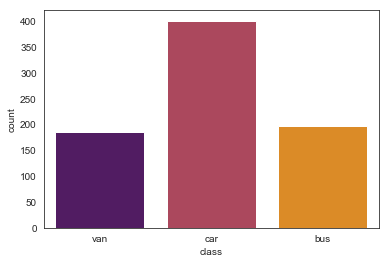

In [116]:
sns.countplot('class',data=df,palette='inferno')


We can see the target column has equal amount of van and bus but twice of cars. which was mentioned in the problem statement.
- There might be some bias towards cars in our model.

## Standardizing and Splitting Test and Train data

In [117]:
X = df.drop(columns='class')  # predictors
y = df['class']

In [118]:
from sklearn.preprocessing import StandardScaler    # to scale the data
from sklearn.model_selection import train_test_split  # to split the data into test and train sets

scaler = StandardScaler()   # creating a scaler object

'''To avoid data leakage, we will fit the scaler object using the train set and then transform the train and test sets using
the fitted Scaler object'''

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state = 1,
                                                    stratify = y)# Stratify y to keep the class proportions consistent

scaler.fit(X_train)  # fitting the scaler object using the train data

X_train_scaled = scaler.transform(X_train)  # transform the train set
X_test_scaled = scaler.transform(X_test)    # transform the test set

'''Because .transform returns nd arrays, assigning them back to the respective dataframes to retain dataframe structure,
but with scaled values'''

X_train.iloc[:,:] = X_train_scaled 
X_test.iloc[:,:] = X_test_scaled

C:\Users\USER\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [119]:
X_train

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,max.length_rectangularity,scaled_variance,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
701,1.754556,0.648595,1.325475,1.002635,0.137028,0.922382,1.096289,-1.124217,0.468317,1.230725,1.197963,0.022465,-0.033225,0.382732,-0.023628,0.293996
605,0.393991,1.297191,1.455187,1.808514,1.755667,1.905810,1.549649,-1.383702,1.303616,1.198253,0.804273,-0.303692,-0.670281,0.826174,-0.519822,0.569486
803,-0.100759,0.324298,0.093203,1.163811,1.755667,-0.552760,0.189568,-0.605246,0.259492,0.029269,0.773989,-0.303692,0.179127,0.715314,1.464953,0.707230
442,-0.348134,-1.459340,-1.463350,-1.382769,-0.942065,-1.044474,-1.533201,1.989610,-1.271890,-1.626792,-1.739571,-0.792926,-0.033225,0.161012,0.472565,0.293996
619,0.393991,1.621489,0.871480,0.035579,-1.301763,0.922382,1.398529,-1.253959,1.721266,0.970951,1.288815,0.511699,-1.307337,-0.947592,-0.850618,-0.394728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322,-0.842885,-0.324298,-1.139068,-1.350533,-0.942065,-0.061046,-0.626480,0.692182,-0.366982,-0.652639,-0.134526,2.142481,-0.033225,-1.058453,-1.512210,-1.909920
408,-0.966573,0.000000,-0.749929,-0.447948,0.856423,-0.552760,-0.717152,0.562439,-0.297374,-0.717582,0.016893,0.022465,-0.245577,-0.725872,-0.023628,0.018507
186,-0.348134,-0.486447,-0.101366,0.776988,1.395970,-1.536188,-0.022000,-0.345760,-0.784632,-0.165562,-0.588784,-0.629848,-0.670281,1.158755,1.464953,1.120465
450,-0.348134,0.162149,-0.490504,0.519107,2.475063,-0.552760,-0.475360,0.173211,-0.088549,-0.360393,0.501435,0.022465,0.391479,-0.504151,0.472565,0.431741


- As we can see all the values have been standardized which means has been mapped to values between -1 to 1 

# Model Score Generator

### First iteration 

In [120]:
def fit_n_print(model, X_train, X_test, y_train, y_test):  # take the model, and data as inputs
    from sklearn import metrics
    
    model.fit(X_train, y_train)   # for the model with the train data

    pred = model.predict(X_test)  # make predictions on the test set

    score = round(model.score(X_test, y_test), 3)   # compute accuracy score for test set
 #   f1_score =  round(2*precision*recall/(precision + recall), 3)
    
    return score# return all the metrics
    

In [122]:
svm = SVC(gamma = 'auto', kernel= 'poly', degree=1)  # Create an SVM model object 
OrigScore=fit_n_print(svm, X_train_scaled, X_test_scaled, y_train, y_test)

In [123]:
OrigScore*100

90.4

We have achieved 90.4 % accuracy with SVM model

### We will perform K folds to check score and validate hwo the model will perform in production

In [124]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

num_folds = 50
seed = 1
kfold = KFold(n_splits=num_folds, random_state=seed)
model =  SVC(gamma = 'auto', kernel= 'poly', degree=1)
results = cross_val_score(model, X, y, cv=kfold)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


[1.         0.875      0.9375     0.9375     1.         1.
 1.         0.9375     0.9375     1.         1.         1.
 1.         1.         1.         1.         0.9375     1.
 1.         0.8125     1.         1.         1.         0.9375
 0.875      1.         1.         0.9375     1.         1.
 0.9375     1.         0.9375     1.         0.875      0.93333333
 1.         0.93333333 1.         0.86666667 1.         1.
 1.         0.93333333 1.         1.         0.93333333 1.
 1.         1.        ]
Accuracy: 96.950% (4.609%)


As we can see the model performs well after k-folds with a mean accuracy of 96.95% adn standard deviation of 4.60% which is pretty good for a model to perform

### Performing PCA 

In [132]:
from scipy.stats import zscore
XScaled=X.apply(zscore)
covMatrix = np.cov(XScaled,rowvar=False)
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
pca.fit(XScaled)

PCA(n_components=6)

Eigen values =6

In [127]:
print(pca.explained_variance_)

[8.02544887 3.31248749 1.16063479 1.1437046  0.87388331 0.63538782]


Eigen Vectors

In [135]:
print(pca.components_)

[[-0.30156987 -0.31600837 -0.3343755  -0.30787872 -0.12230458 -0.22782452
  -0.33626073  0.3371164  -0.30506341 -0.32801601 -0.2856737   0.07082957
  -0.04342726 -0.06625998 -0.05306148 -0.1124303 ]
 [-0.06241663  0.17271894 -0.0156313  -0.17771901 -0.24630958 -0.0664644
   0.09951591 -0.03789374  0.15903267  0.09575821  0.23833492  0.50202011
  -0.01165169 -0.08356685 -0.50674066 -0.50082397]
 [ 0.0564092   0.15516856 -0.06716409 -0.13311115 -0.08787558  0.18298814
  -0.12895336  0.13260739  0.18938226 -0.17180842  0.14856748 -0.11190234
   0.6608858  -0.5726591   0.07142001  0.07282273]
 [ 0.12463032 -0.0718238   0.12980266 -0.22108491 -0.60380848  0.25946712
   0.03032941  0.04101871  0.00342509 -0.01463474 -0.12126736 -0.10452979
   0.32558836  0.58155852 -0.04954901  0.08086853]
 [ 0.13140248 -0.10096452 -0.05613156  0.16588208  0.17630222 -0.59094163
   0.09404653 -0.0933866  -0.2277876   0.16262202  0.0203799   0.17614761
   0.59092725  0.22351268  0.13322751 -0.13165377]
 [ 0.3

In [136]:
print(pca.explained_variance_ratio_)

[0.50095159 0.20676674 0.07244727 0.07139048 0.05454813 0.03966115]


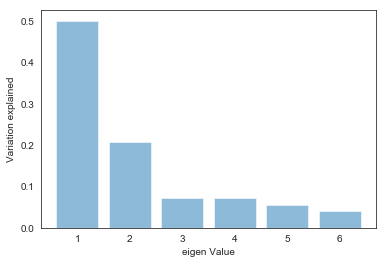

In [137]:
plt.bar(list(range(1,7)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

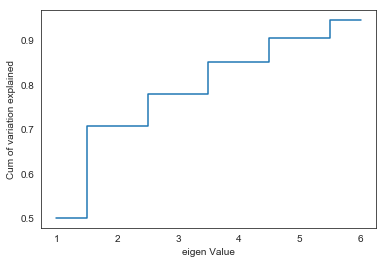

In [138]:
plt.step(list(range(1,7)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

- As we can see the most of the data is covered by the first 4 
- So we will try to explain data using only 4 dimensions

In [140]:
pca4 = PCA(n_components=4)
pca4.fit(XScaled)
print(pca4.components_)
print(pca4.explained_variance_ratio_)
Xpca4 = pca4.transform(XScaled)

[[-0.30156987 -0.31600837 -0.3343755  -0.30787872 -0.12230458 -0.22782452
  -0.33626073  0.3371164  -0.30506341 -0.32801601 -0.2856737   0.07082957
  -0.04342726 -0.06625998 -0.05306148 -0.1124303 ]
 [-0.06241663  0.17271894 -0.0156313  -0.17771901 -0.24630958 -0.0664644
   0.09951591 -0.03789374  0.15903267  0.09575821  0.23833492  0.50202011
  -0.01165169 -0.08356685 -0.50674066 -0.50082397]
 [ 0.0564092   0.15516856 -0.06716409 -0.13311115 -0.08787558  0.18298814
  -0.12895336  0.13260739  0.18938226 -0.17180842  0.14856748 -0.11190234
   0.6608858  -0.5726591   0.07142001  0.07282273]
 [ 0.12463032 -0.0718238   0.12980266 -0.22108491 -0.60380848  0.25946712
   0.03032941  0.04101871  0.00342509 -0.01463474 -0.12126736 -0.10452979
   0.32558836  0.58155852 -0.04954901  0.08086853]]
[0.50095159 0.20676674 0.07244727 0.07139048]


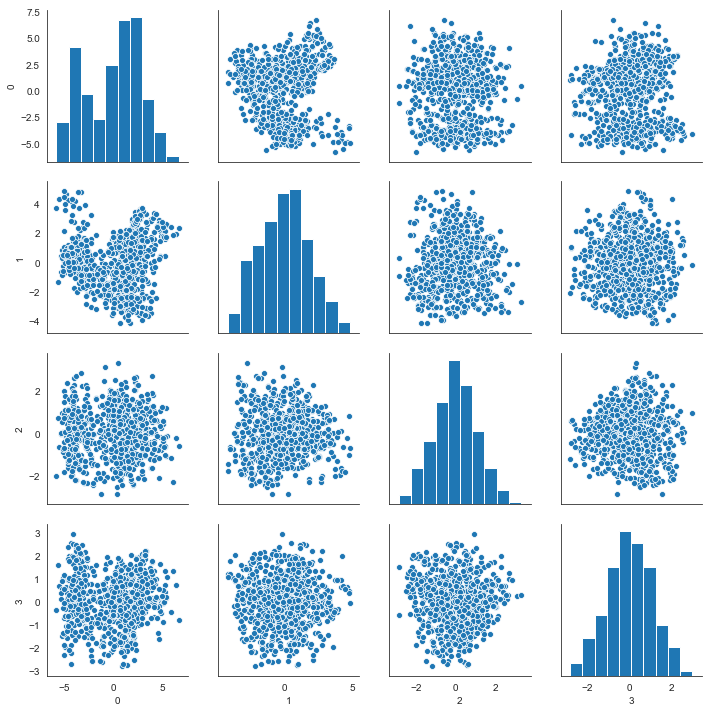

In [141]:
sns.pairplot(pd.DataFrame(Xpca4))

As we can see there is no correlation between any of the columns. Hence it shows it is a good reduction|

In [153]:
svmPCA = SVC(gamma = 'auto', kernel= 'poly', degree=1)  # Create an SVM model object 
svmPCA.fit(Xpca4, y)
svm4=svmPCA.score(Xpca4, y)
svm4

0.6815286624203821

The PCA model of 4 Dimesnsions has shown 68 % accuracy which is not much so we will try to use different values for reduction

In [154]:
pca5 = PCA(n_components=5)
pca5.fit(XScaled)
#print(pca5.components_)
#print(pca5.explained_variance_ratio_)
Xpca5 = pca5.transform(XScaled)
svmPCA1 = SVC(gamma = 'auto', kernel= 'poly', degree=1)  # Create an SVM model object 
svmPCA1.fit(Xpca5, y)
svm5=svmPCA1.score(Xpca5, y)
svm5

0.8012738853503185

With 5 eigen values we get more accuracy than 4. 

In [155]:
pca6 = PCA(n_components=6)
pca6.fit(XScaled)
#print(pca5.components_)
#print(pca5.explained_variance_ratio_)
Xpca6 = pca6.transform(XScaled)
svmPCA2 = SVC(gamma = 'auto', kernel= 'poly', degree=1)  # Create an SVM model object 
svmPCA2.fit(Xpca6, y)
svm6= svmPCA2.score(Xpca6, y)
svm6

0.8369426751592357

We can see an increase of 3% when when it is 6 components.

In [156]:
pca7 = PCA(n_components=7)
pca7.fit(XScaled)
#print(pca5.components_)
#print(pca5.explained_variance_ratio_)
Xpca7 = pca7.transform(XScaled)
svmPCA3 = SVC(gamma = 'auto', kernel= 'poly', degree=1)  # Create an SVM model object 
svmPCA3.fit(Xpca7, y)
svm7=svmPCA3.score(Xpca7, y)
svm7

0.8496815286624204

When we try for 7 components. we get an increase of 1%.


In [159]:
result= pd.DataFrame({'Model' : ['Normal SVM', 'PCA-4', "PCA-5", 'PCA-6'],
                    'Accuracy': [  OrigScore*100, svm4*100, svm5*100 ,svm6*100 ],});
result

,Model,Accuracy
0,Normal SVM,90.400000
1,PCA-4,68.152866
2,PCA-5,80.127389
3,PCA-6,83.694268


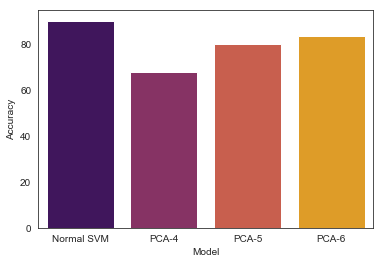

In [164]:
sns.barplot(x=result['Model'],y=result['Accuracy'],data=result,palette='inferno')

- As we can see the Normal SVM has more accuracy for the test data but it might not do well in Production as we saw when we did Cross Validation.
- So based on the data it is a judgement call between PCA-5 and PCA-6.
- Since there is not much differece between PCA-5 and PCA-6 . It is better to choose PCA-5 as it explains almost the same with less dimensions.
- So final answer :PCA-5

### The END